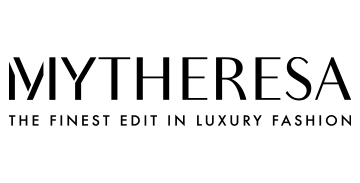

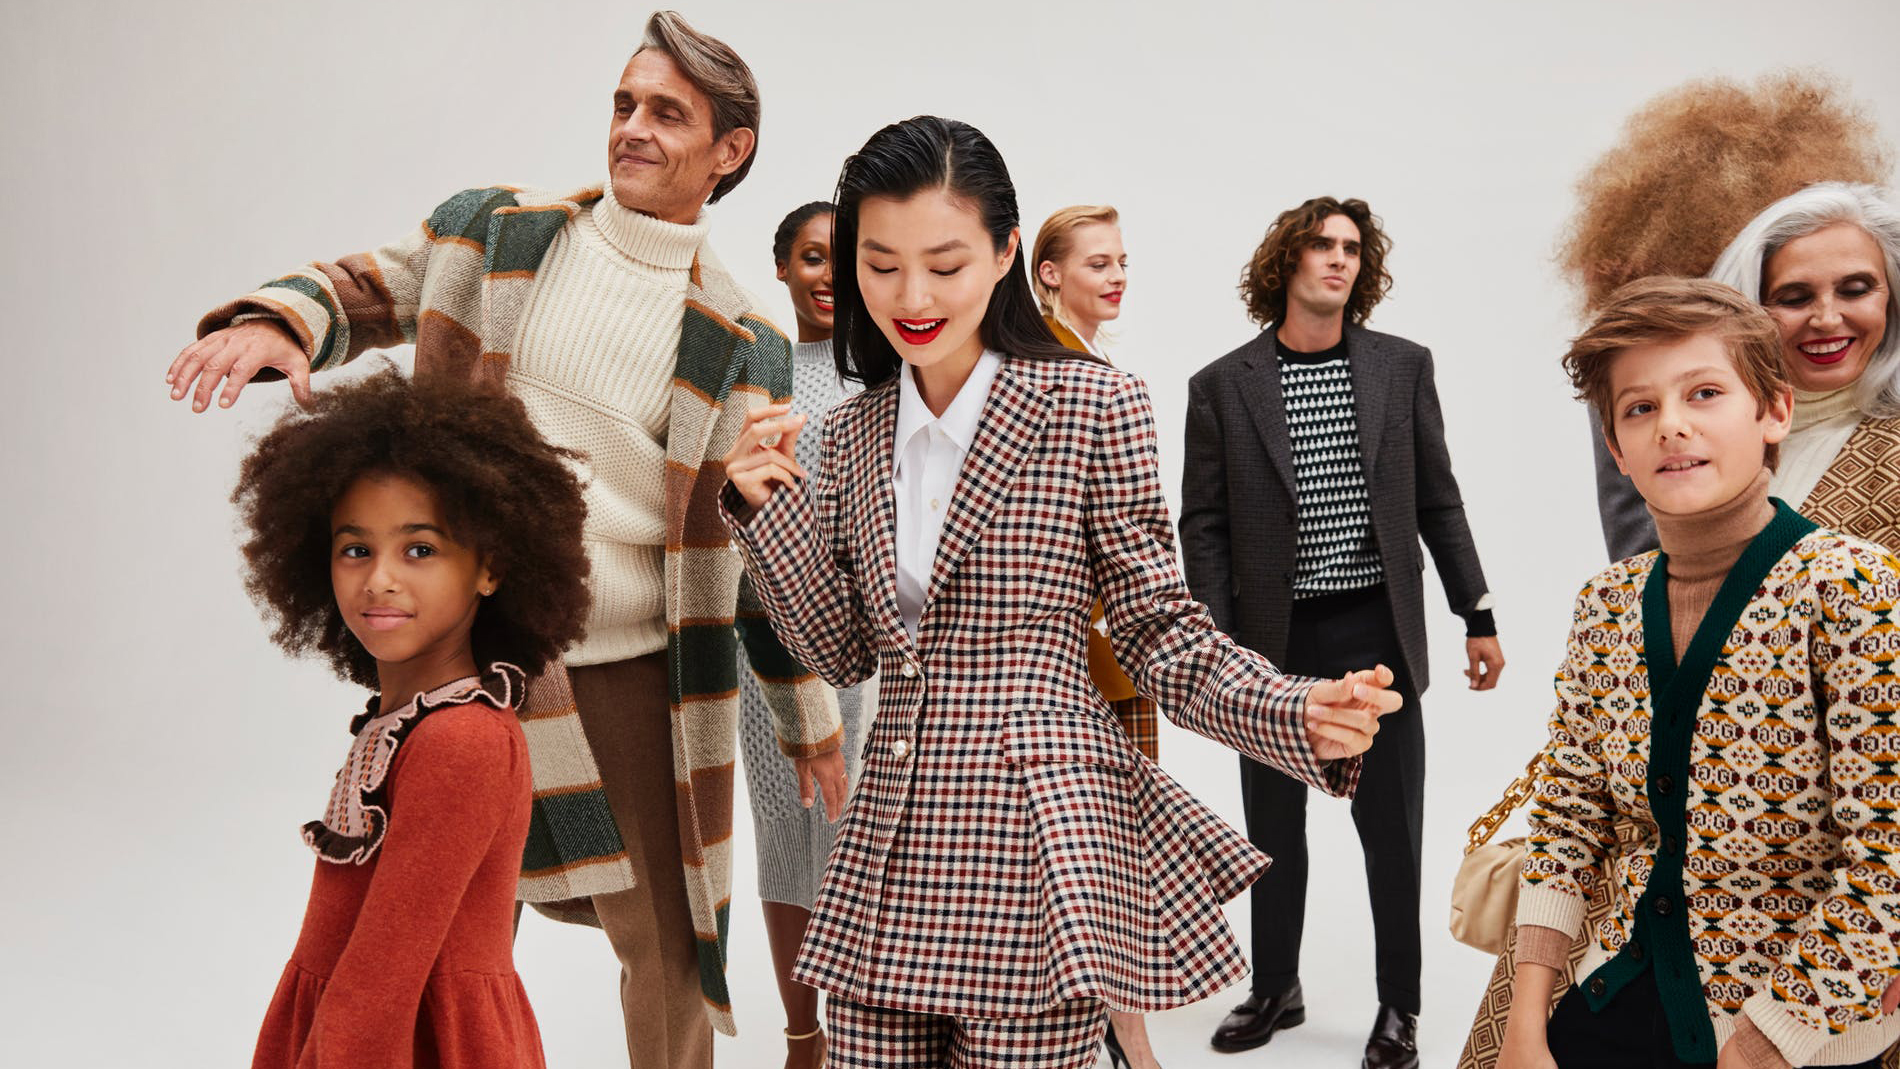
____

## `Import Necessary Libraries`

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time as t
import csv
import random
import threading as th

## `Import Chromedriver and Scraping Clothing Data From MYTHERESA Website`

In [6]:
# Chrome driver Path
chromepath= r"chromedriver.exe"

option= webdriver.ChromeOptions()      # open google chrome session

option.add_argument('-disk-cache-size= 3000000000')   # OPTIONAL,    --->  make memory cache size = 3000000000                                                                                                                                                                                                                                                                                                                         
driver= webdriver.Chrome(executable_path= chromepath, options= option)   # open driver

# ++++++++++++++++++++++++++++++++++++

driver.get(f'https://www.mytheresa.com/int_en/clothing.html?p=1')
nums_of_products= driver.find_element(By.CSS_SELECTOR, "p[class='amount amount-has-pages']").text.split(' ')[0]
products_per_page= 60
nums_of_pages= int(nums_of_products) // products_per_page


product_designer_lst= []
product_Name_lst=[]
product_Price_lst=[]
product_no_lst= []
product_discount_lst= []
product_features_lst= []

try:
    pg_counter= 0
    for i in range(1, nums_of_pages+1):
        driver.get(f'https://www.mytheresa.com/int_en/clothing.html?p={i}')

        # Scrap Products Links:
        items_link_lst= []
        containers= driver.find_elements(By.CSS_SELECTOR, "li[class='item']")
        for container in containers:
            link= container.find_element(By.CSS_SELECTOR, "a[class='product-image']").get_attribute('href')
            items_link_lst.append(link)

        containers= driver.find_elements(By.CSS_SELECTOR, "li[class='item last']")
        for container in containers:
            link= container.find_element(By.CSS_SELECTOR, "a[class='product-image']").get_attribute('href')
            items_link_lst.append(link)


        for link in items_link_lst:
            driver.get(link)

            # scrap_product-designer:
            try:
                product_designer= driver.find_element(By.XPATH, "/html/body/div[1]/div/div[2]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div[1]/form/div[3]/div[1]/span/a").text         
                product_designer_lst.append(product_designer) 
            except:
                product_designer_lst.append('')
#             t.sleep(2)

            # scrap_product_Name:
            try:
                product_Name= driver.find_element(By.CSS_SELECTOR, "span[class= 'pb2  ']").text         
                product_Name_lst.append(product_Name)
            except:
                product_Name_lst.append('')
#             t.sleep(2)

            # scrap_product_price:
            try:
                product_Price= driver.find_element(By.CSS_SELECTOR, "span[class= 'price']").text         
                product_Price_lst.append(product_Price)
            except:
                product_Price_lst.append('')
#             t.sleep(2)

            # scrap_product-sku:
            try:
                product_no= driver.find_element(By.CSS_SELECTOR, "span[class= 'h1']").text.split(' ')[2]         
                product_no_lst.append(product_no)
            except:
                product_no_lst.append('')
#             t.sleep(2)

            # scrap_product_features:
            product_features_test= []
            for i in range(15):
                try:
                    product_feature= driver.find_element(By.CSS_SELECTOR, "ul[class= 'disc featurepoints']").find_element(By.CSS_SELECTOR, f"li:nth-child({i})").text        
                    product_features_test.append(product_feature)
                except:
                    product_features_test.append('')
            product_features_lst.append([i for i in product_features_test if len(i) > 0])
#             t.sleep(2)

            # scrap_product_Discount:
            try:
                product_discount= driver.find_element(By.CSS_SELECTOR, "span[class= 'price-reduction-notice extra-discount']").text         
                product_discount_lst.append(product_discount)
            except:
                product_discount_lst.append('')
                
            t.sleep(2)
        pg_counter += 1
except:
    print(f"We Have Only {pg_counter} pages ")

#########################################################


from itertools import zip_longest
from csv import writer

file_list= [product_designer_lst, product_Name_lst, product_Price_lst, product_no_lst, product_discount_lst, product_features_lst]
exported= zip_longest(*file_list)

with open(f'Clothes.csv', 'w', encoding="utf-8") as csv_file:
    wr= writer(csv_file)
    wr.writerow(['Product Designer', 'Product Name', 'Product Price', 'Product No', 'Product Discount', 'Product Features'])
    wr.writerows(exported)

C:\Users\nooor\AppData\Local\Temp\ipykernel_10812\2981799120.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(executable_path= chromepath, options= option)   # open driver


## `View Sample From Entire Scraped Data`

In [2]:
import pandas as pd

df1= pd.read_csv('Clothes.csv')
print(df1.shape)

with pd.option_context('display.max_colwidth', None):
    display(df1.head())

(3050, 6)


,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Features
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,"['material: 100% linen', 'care instructions: hand wash', 'side slit pockets', 'Made in the USA']"
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"['material: 66% cotton, 31% viscose, 3% elastane', 'care instructions: hand wash', 'side slit pockets, faux pockets', 'zipper fly, button fastening']"
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,"['care instructions: machine wash cold', 'five pockets', 'zipper fly, button fastening', 'Made in Turkey']"
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"['material: 70% virgin wool, 30% cashmere', 'care instructions: hand wash', 'Made in China', 'Designer colour name: 225-41']"
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"['material: 100% viscose', 'material II: 65% viscose, 35% cupro', 'material III: 100% silk', 'care instructions: dry clean']"


____
## `Exploratory Data Analysis - EDA` & `Feature Engineering`

In [3]:
import ast

output= df1['Product Features'].map(lambda x: ast.literal_eval(x))
data= pd.DataFrame(output)
data

,Product Features
0,"[material: 100% linen, care instructions: hand..."
1,"[material: 66% cotton, 31% viscose, 3% elastan..."
2,"[care instructions: machine wash cold, five po..."
3,"[material: 70% virgin wool, 30% cashmere, care..."
4,"[material: 100% viscose, material II: 65% visc..."
...,...
3045,"[material: 100% cotton, filling: 100% polyeste..."
3046,"[material: 82% triacetate, 18% polyester, care..."
3047,"[material: 100% wool, care instructions: dry c..."
3048,"[material: 99% organic cotton, 1% elastane, ca..."


In [4]:
import numpy as np
l= ['material', 'lining', 'care instructions', 'Made in', 'Designer colour name']

Material= []
Lining= []
Care_Instructions= []
Manufacturing_Country= []
Colour= []

for i in l:
    for j in range(len(data)):
        if i == 'material':
            material_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Material.append(material_filter)
            
        elif i == 'lining':
            lining_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Lining.append(lining_filter)
        
        elif i == 'care instructions':
            care_instructions_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Care_Instructions.append(care_instructions_filter)
        
        elif i == 'Made in':
            manufacturing_country_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Manufacturing_Country.append(manufacturing_country_filter)
        
        elif i == 'Designer colour name':
            colour_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Colour.append(colour_filter)
        
print(len(Material), '\n')
print(len(Lining), '\n')
print(len(Care_Instructions), '\n')
print(len(Manufacturing_Country), '\n')
print(len(Colour), '\n')

3050 

3050 

3050 

3050 

3050 



In [5]:
Material_lst= []
Lining_lst= []
Care_Instructions_lst= []
Manufacturing_Country_lst= []
Colour_lst= []

for i in Material:
    if len(i)>0:
        Material_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Material_lst.append(np.nan)

for i in Lining:
    if len(i)>0:
        Lining_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Lining_lst.append(np.nan)
    
for i in Care_Instructions:
    if len(i)>0:
        Care_Instructions_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Care_Instructions_lst.append(np.nan)

for i in Manufacturing_Country:
    if len(i)>0:
        Manufacturing_Country_lst.append(', '.join(i).split(' ')[-1].strip())
    else:
        Manufacturing_Country_lst.append(np.nan)
        
for i in Colour:
    if len(i)>0:
        Colour_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Colour_lst.append(np.nan)

In [6]:
print(len(Material_lst), '\n')
Material_lst

3050 



['100% linen',
 '66% cotton, 31% viscose, 3% elastane',
 nan,
 '70% virgin wool, 30% cashmere',
 '100% viscose, material II',
 '100% cotton',
 '100% lamb leather, material II',
 '97% cotton, 3% elastane',
 '100% ramie',
 '100% cotton',
 '100% cotton',
 '72% polyester, 28% elastane',
 '81% recycled polyester, 19% elastane',
 '70% virgin wool, 30% cashmere',
 '52% polyester, 48% cotton',
 '70% virgin wool, 30% cashmere',
 '100% polyester',
 '93% polyester, 7% elastane, material II',
 '100% cotton',
 '100% polyamide, material II',
 '70% cashmere, 30% silk',
 '100% cotton',
 '72% nylon, 28% elastane',
 '97% polyester, 3% elastane',
 '100% cotton',
 '100% linen',
 '70% wool, 30% cashmere',
 '100% polyamide',
 '98% cotton, 2% elastane',
 '80% polyester, 20% elastane',
 '69% viscose, 31% polyamide',
 '82% viscose, 18% polyester',
 '95% polyester, 5% elastane',
 '95% polyester, 5% elastane',
 '79% wool, 21% polyamide',
 '92% polyester, 8% elastane',
 '100% virgin wool',
 '97% cotton, 3% elasta

In [7]:
data['Product Material']= Material_lst
data['Product Lining']= Lining_lst
data['Product Care Instructions']= Care_Instructions_lst
data['Product Manufacturing Country']= Manufacturing_Country_lst
data['Product Colour']= Colour_lst

In [8]:
all_data= pd.concat([df1.iloc[:, :-1], data], axis= 1)
all_data.drop('Product Features', axis= 1, inplace= True)
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,NaN,hand wash,USA,NaN
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",NaN,hand wash,NaN,NaN
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,NaN,NaN,machine wash cold,Turkey,NaN
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"70% virgin wool, 30% cashmere",NaN,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"100% viscose, material II",NaN,dry clean,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,NaN,100% cotton,"100% cashmere, fully lined",NaN,NaN,NaN
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,NaN,"82% triacetate, 18% polyester",NaN,dry clean,China,NaN
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,NaN,100% wool,NaN,dry clean,China,NaN
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",NaN,machine wash at 30 degrees,NaN,NaN


## `Check Null Values and impute it`

In [9]:
all_data.isna().sum()

Product Designer                   22
Product Name                       16
Product Price                      16
Product No                         16
Product Discount                 1580
Product Material                  138
Product Lining                   2134
Product Care Instructions         354
Product Manufacturing Country    1544
Product Colour                   2487
dtype: int64

In [10]:
all_data['Product Designer'].fillna(all_data['Product Designer'].value_counts().index[0], inplace= True)
all_data['Product Name'].fillna(all_data['Product Name'].value_counts().index[0], inplace= True)
all_data['Product Price'].fillna(all_data['Product Price'].value_counts().index[0], inplace= True)
all_data['Product No'].fillna(all_data['Product No'].value_counts().index[0], inplace= True)
all_data['Product Discount'].fillna('No discount', inplace= True)
all_data['Product Material'].fillna(all_data['Product Material'].value_counts().index[0], inplace= True)
all_data['Product Lining'].fillna('No lining', inplace= True)
all_data['Product Care Instructions'].fillna(all_data['Product Care Instructions'].value_counts().index[0], inplace= True)
all_data['Product Manufacturing Country'].fillna('Not mentioned', inplace= True)
all_data['Product Colour'].fillna(all_data['Product Colour'].value_counts().index[0], inplace= True)

In [11]:
# Check after impute nan values:

all_data.isna().sum()    # as shown there are no null values

Product Designer                 0
Product Name                     0
Product Price                    0
Product No                       0
Product Discount                 0
Product Material                 0
Product Lining                   0
Product Care Instructions        0
Product Manufacturing Country    0
Product Colour                   0
dtype: int64

In [12]:
# View entire Data after clean it, it's now ready to visualizing
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black
